# Conclusion

Pruned values found with `GridSearchCV`.

Highest found metrics for each target in **bold**.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **72% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.64|0.58|0.56|0.57|0.69|0.70|0.70|
|max_depth=5|**0.72**|**0.69**|**0.59**|**0.64**|**0.73**|0.81|**0.77**|
|min_impurity_decrease=0.05|0.68|0.66|0.48|0.56|0.69|**0.83**|0.75|
|max_leaf_nodes=31|0.72|0.46|0.52|0.49|0.62|0.56|0.59|0.62|
|max_features=None|0.64|0.57|0.56|0.57|0.69|0.70|0.69|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **63% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.56|0.52|0.51|0.51|0.59|0.60|0.60|
|max_depth=5|**0.63**|**0.63**|0.48|0.55|0.63|**0.76**|**0.69**|
|min_impurity_decrease=0.0|0.56|0.52|0.51|0.52|0.59|0.60|0.60|
|max_leaf_nodes=24|0.63|0.61|**0.54**|**0.57**|**0.64**|0.71|0.68|
|max_features=8|0.57|0.53|0.52|0.53|0.60|0.61|0.61|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **58% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.52|0.52|0.50|0.51|0.52|0.53|0.53|
|max_depth=5|**0.58**|**0.60**|0.46|0.52|**0.57**|**0.70**|**0.63**|
|min_impurity_decrease=0.0|0.53|0.53|**0.52**|**0.53**|0.54|0.55|0.54|
|max_leaf_nodes=13|0.58|0.60|0.46|0.52|0.57|0.70|0.63|
|max_features=9|0.54|0.53|0.51|0.52|0.54|0.56|0.55|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **60% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.54|0.55|0.54|0.55|0.53|0.55|0.54|
|max_depth=7|**0.60**|0.62|**0.56**|**0.59**|**0.59**|0.65|0.62|
|min_impurity_decrease=0.0|0.54|0.55|0.54|0.55|0.53|0.55|0.54|
|max_leaf_nodes=25|0.61|**0.64**|0.51|0.57|0.58|**0.70**|**0.64**|
|max_features=9|0.54|0.55|0.54|0.54|0.53|0.54|0.53|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **63% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.57|0.52|0.51|0.52|0.60|0.61|0.61|
|max_depth=5|**0.63**|**0.62**|0.49|0.55|**0.64**|**0.75**|**0.69**|
|min_impurity_decrease=0.0|0.57|0.53|**0.53**|0.53|0.61|0.61|0.61|
|max_leaf_nodes=40|0.63|0.61|0.51|**0.56**|0.64|0.72|0.68|
|max_features=10|0.58|0.54|0.52|0.53|0.61|0.62|0.61|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **60% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.54|0.50|0.49|0.50|0.58|0.59|0.58|
|max_depth=6|**0.60**|**0.58**|0.45|0.51|0.61|**0.72**|**0.66**|
|min_impurity_decrease=0.0|0.56|0.51|0.54|0.53|0.59|0.57|0.58|
|max_leaf_nodes=28|0.60|0.57|**0.54**|**0.55**|**0.62**|0.65|0.64|
|max_features=11|0.55|0.50|0.51|0.51|0.58|0.58|0.58|

In [1]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [37]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [5]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [6]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [7]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [8]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [9]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [10]:
games_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
16157,2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0
16156,2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0
16155,2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0
16154,2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0
16153,2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0
3,2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0
2,2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0
1,2020-12-19,12000048,1610612764,1610612765,2020,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0


In [11]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,APG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,...,APG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,PPG_total_away,RPG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home
0,2003-10-05,10300001,1,2003,1,1,23.000000,0.457000,0.143000,0.735000,...,20.0,0.44700,0.25000,0.50000,85.00,38.00,1610612742,1610612762,0.00,0.000
1,2003-10-06,10300002,1,2003,1,1,25.000000,0.494000,0.267000,0.618000,...,20.0,0.42700,0.15400,0.70000,94.00,43.00,1610612749,1610612763,0.00,0.000
2,2003-10-07,10300009,1,2003,1,1,19.000000,0.467000,0.444000,0.871000,...,13.0,0.36800,0.36400,0.60900,82.00,50.00,1610612746,1610612758,0.00,0.000
3,2003-10-07,10300005,1,2003,1,1,22.000000,0.527000,0.429000,0.657000,...,10.0,0.47000,0.33300,0.66700,80.00,37.00,1610612745,1610612757,0.00,0.000
4,2003-10-07,10300007,1,2003,1,1,15.000000,0.352000,0.222000,0.647000,...,7.0,0.32900,0.14300,0.89700,79.00,44.00,1610612755,1610612748,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,3,2,25.666667,0.422333,0.354000,0.706333,...,28.0,0.48050,0.39850,0.77950,104.50,43.00,1610612748,1610612761,0.50,0.667
23516,2020-12-18,12000039,1,2020,3,2,23.666667,0.415667,0.342667,0.643333,...,23.0,0.50200,0.29800,0.68950,110.50,45.00,1610612755,1610612754,1.00,0.000
23517,2020-12-19,12000049,1,2020,4,4,28.250000,0.450000,0.346000,0.714500,...,24.0,0.40000,0.32350,0.80150,112.75,53.75,1610612737,1610612763,0.50,0.750
23518,2020-12-19,12000048,1,2020,3,4,22.666667,0.419000,0.312667,0.678000,...,19.5,0.41050,0.33125,0.69650,94.00,44.00,1610612765,1610612764,0.50,0.333


## Remove non-data

In [12]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
for key in ['DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away']:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

,APG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,PPG_total_home,RPG_total_home,APG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,PPG_total_away,RPG_total_away,W_PCT_away,W_PCT_home
0,23.000000,0.457000,0.143000,0.735000,90.000000,41.000000,20.0,0.44700,0.25000,0.50000,85.00,38.00,0.00,0.000
1,25.000000,0.494000,0.267000,0.618000,105.000000,48.000000,20.0,0.42700,0.15400,0.70000,94.00,43.00,0.00,0.000
2,19.000000,0.467000,0.444000,0.871000,101.000000,39.000000,13.0,0.36800,0.36400,0.60900,82.00,50.00,0.00,0.000
3,22.000000,0.527000,0.429000,0.657000,104.000000,33.000000,10.0,0.47000,0.33300,0.66700,80.00,37.00,0.00,0.000
4,15.000000,0.352000,0.222000,0.647000,86.000000,55.000000,7.0,0.32900,0.14300,0.89700,79.00,44.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,25.666667,0.422333,0.354000,0.706333,109.333333,40.000000,28.0,0.48050,0.39850,0.77950,104.50,43.00,0.50,0.667
23516,23.666667,0.415667,0.342667,0.643333,105.666667,38.666667,23.0,0.50200,0.29800,0.68950,110.50,45.00,1.00,0.000
23517,28.250000,0.450000,0.346000,0.714500,118.500000,50.250000,24.0,0.40000,0.32350,0.80150,112.75,53.75,0.50,0.750
23518,22.666667,0.419000,0.312667,0.678000,99.666667,44.666667,19.5,0.41050,0.33125,0.69650,94.00,44.00,0.50,0.333


## Train test split

In [19]:
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_train_dict[key], X_test_dict[key], y_train_dict[key], y_test_dict[key] = train_test_split(
        cumulative_stats_copy_df,
        target,
        train_size=0.8,
        random_state=0,
    )

## Do cross validation searches of hyperparameters

In [40]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [69]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y)
    return clf

## Plot feature importances

In [42]:
def plot_feature_importances(clf):
    viz = FeatureImportances(
        clf,
        labels=cumulative_stats_copy_df.columns,
    )
    viz.fit(
        cumulative_stats_copy_df,
        winners_df,
    )
    viz.show()

## Train decision tree w/o pruning

In [37]:
from sklearn.metrics import classification_report

In [66]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, grid_cv_params):
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
            GridSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), cv_clf.score(X_test_dict[key], y_test_dict[key])))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_)
        print('---------------------------------------------')

WINNER:

Best decision tree accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1962
           1       0.69      0.70      0.70      2742

    accuracy                           0.64      4704
   macro avg       0.63      0.63      0.63      4704
weighted avg       0.64      0.64      0.64      4704



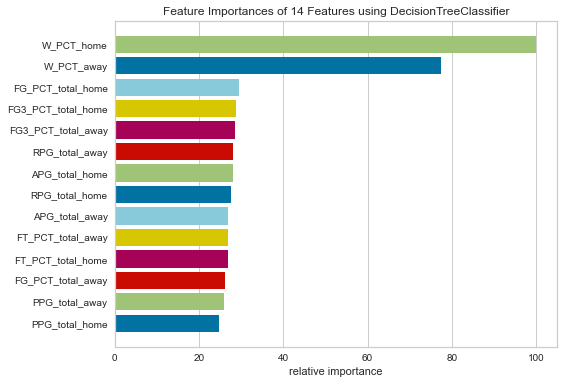

---------------------------------------------
FGP:

Best decision tree accuracy ({}): 0.56
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      2162
           1       0.59      0.60      0.60      2542

    accuracy                           0.56      4704
   macro avg       0.56      0.56      0.56      4704
weighted avg       0.56      0.56      0.56      4704



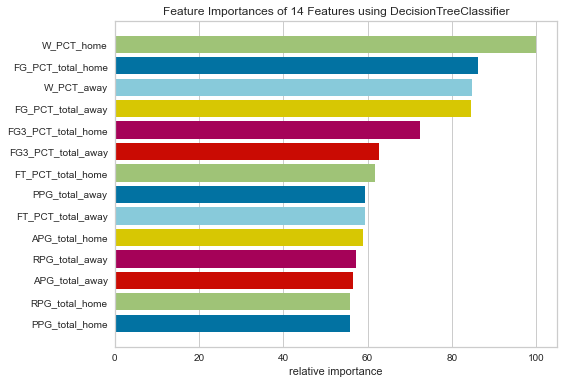

---------------------------------------------
FG3:

Best decision tree accuracy ({}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      2332
           1       0.52      0.53      0.53      2372

    accuracy                           0.52      4704
   macro avg       0.52      0.52      0.52      4704
weighted avg       0.52      0.52      0.52      4704



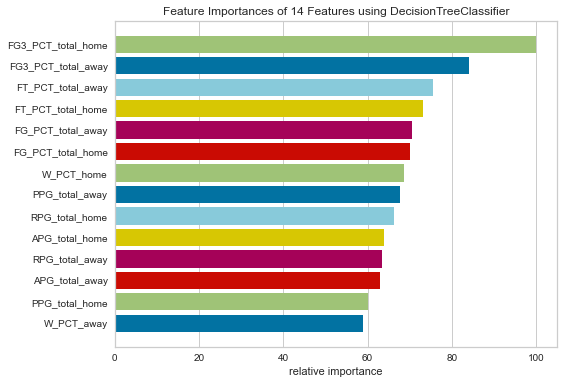

---------------------------------------------
FT:

Best decision tree accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      2403
           1       0.53      0.55      0.54      2301

    accuracy                           0.54      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.54      0.54      0.54      4704



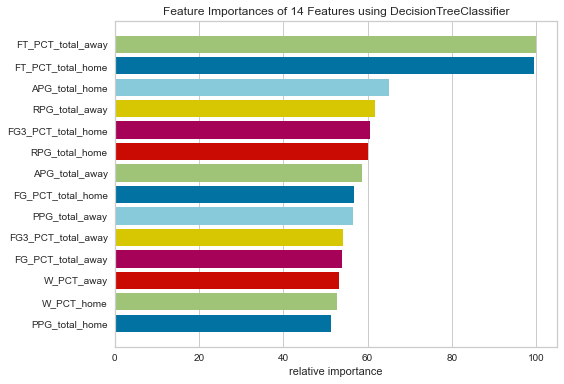

---------------------------------------------
AST:

Best decision tree accuracy ({}): 0.57
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      2144
           1       0.60      0.61      0.61      2560

    accuracy                           0.57      4704
   macro avg       0.56      0.56      0.56      4704
weighted avg       0.57      0.57      0.57      4704



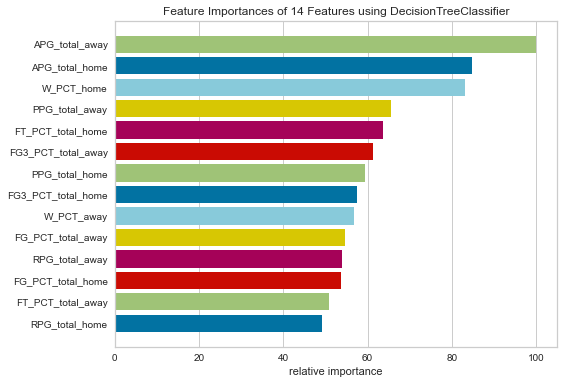

---------------------------------------------
REB:

Best decision tree accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2154
           1       0.58      0.59      0.58      2550

    accuracy                           0.54      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.54      0.54      0.54      4704



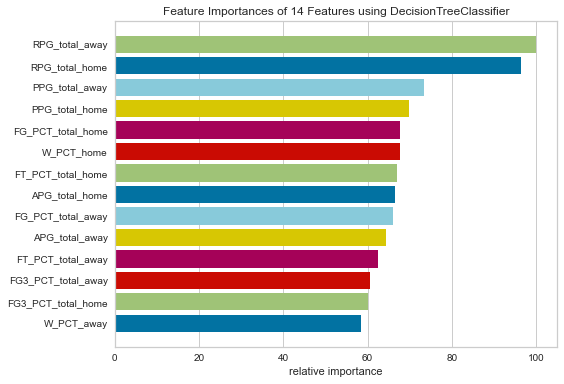

---------------------------------------------


In [68]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {},
)

In [41]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'max_depth': 5}): 0.72
              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1962
           1       0.73      0.81      0.77      2742

    accuracy                           0.72      4704
   macro avg       0.71      0.70      0.70      4704
weighted avg       0.72      0.72      0.72      4704



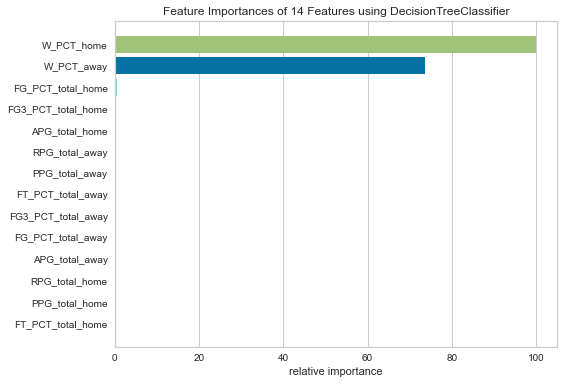

---------------------------------------------
FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'max_depth': 5}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      2162
           1       0.63      0.76      0.69      2542

    accuracy                           0.63      4704
   macro avg       0.63      0.62      0.62      4704
weighted avg       0.63      0.63      0.63      4704



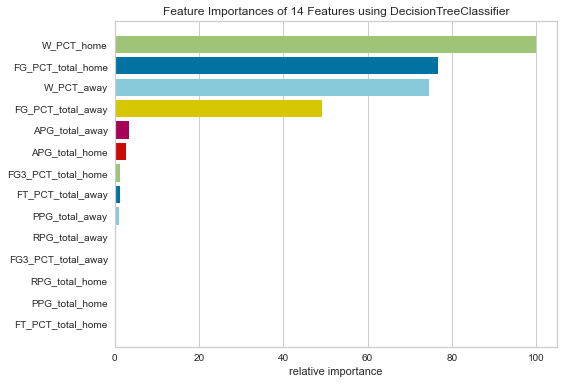

---------------------------------------------
FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'max_depth': 5}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      2332
           1       0.57      0.70      0.63      2372

    accuracy                           0.58      4704
   macro avg       0.58      0.58      0.57      4704
weighted avg       0.58      0.58      0.57      4704



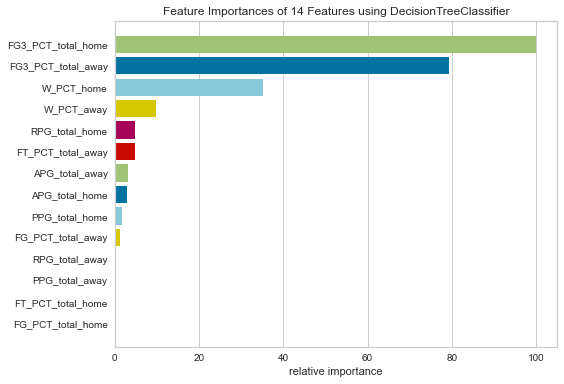

---------------------------------------------
FT:

Best decision tree accuracy ({'criterion': 'entropy', 'max_depth': 7}): 0.60
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      2403
           1       0.59      0.65      0.62      2301

    accuracy                           0.60      4704
   macro avg       0.60      0.60      0.60      4704
weighted avg       0.61      0.60      0.60      4704



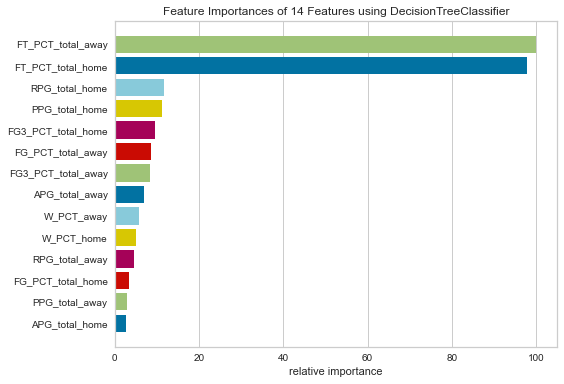

---------------------------------------------
AST:

Best decision tree accuracy ({'criterion': 'gini', 'max_depth': 5}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      2144
           1       0.64      0.75      0.69      2560

    accuracy                           0.63      4704
   macro avg       0.63      0.62      0.62      4704
weighted avg       0.63      0.63      0.62      4704



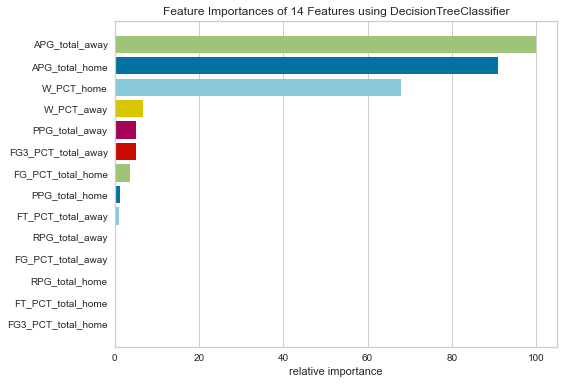

---------------------------------------------
REB:

Best decision tree accuracy ({'criterion': 'gini', 'max_depth': 6}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.45      0.51      2154
           1       0.61      0.72      0.66      2550

    accuracy                           0.60      4704
   macro avg       0.60      0.59      0.59      4704
weighted avg       0.60      0.60      0.59      4704



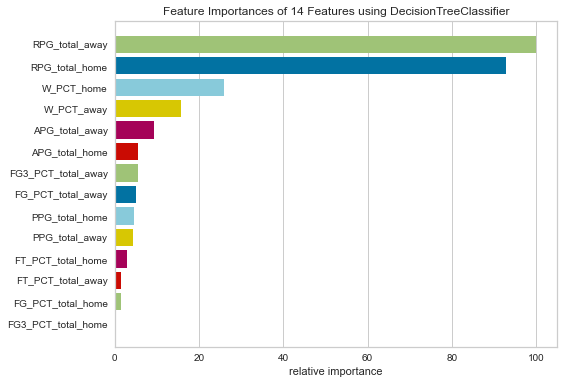

---------------------------------------------


In [71]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,33)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune impurity decrease

WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'min_impurity_decrease': 0.05}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.48      0.56      1962
           1       0.69      0.83      0.75      2742

    accuracy                           0.68      4704
   macro avg       0.68      0.65      0.65      4704
weighted avg       0.68      0.68      0.67      4704



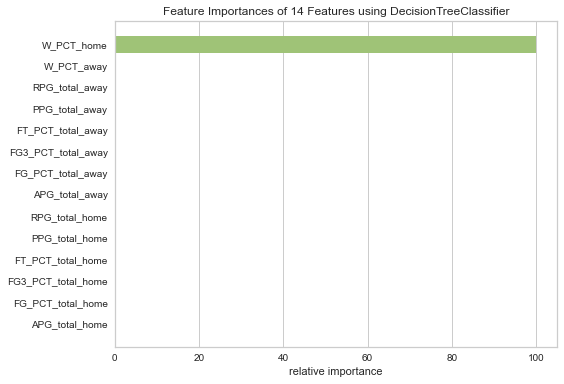

---------------------------------------------
FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'min_impurity_decrease': 0.0}): 0.56
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      2162
           1       0.59      0.60      0.60      2542

    accuracy                           0.56      4704
   macro avg       0.56      0.56      0.56      4704
weighted avg       0.56      0.56      0.56      4704



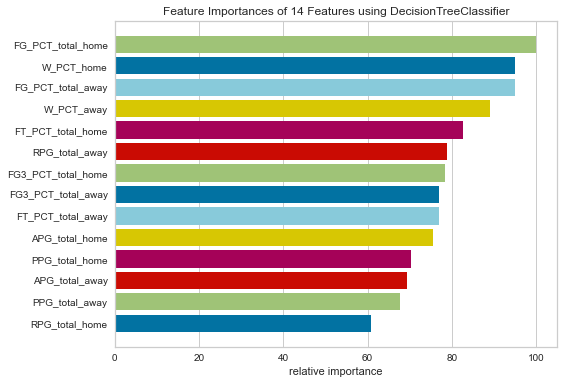

---------------------------------------------
FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'min_impurity_decrease': 0.0}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      2332
           1       0.54      0.55      0.54      2372

    accuracy                           0.53      4704
   macro avg       0.53      0.53      0.53      4704
weighted avg       0.53      0.53      0.53      4704



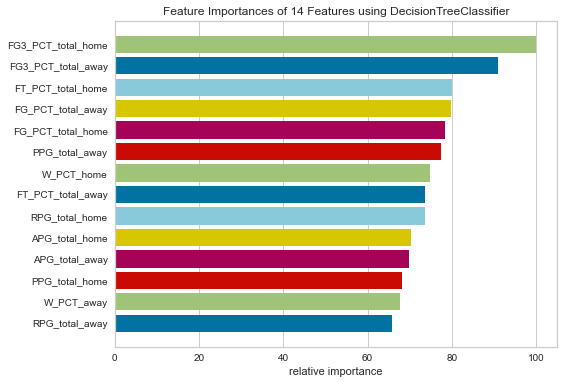

---------------------------------------------
FT:

Best decision tree accuracy ({'criterion': 'gini', 'min_impurity_decrease': 0.0}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      2403
           1       0.53      0.55      0.54      2301

    accuracy                           0.54      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.54      0.54      0.54      4704



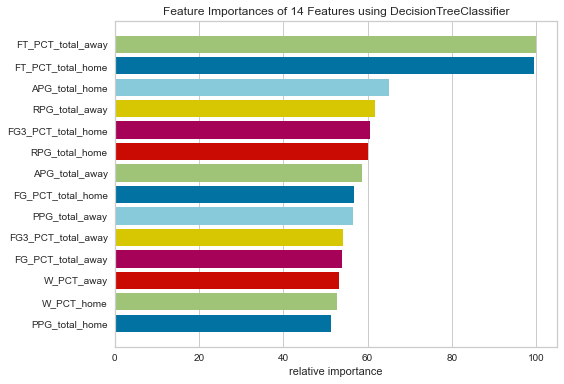

---------------------------------------------
AST:

Best decision tree accuracy ({'criterion': 'entropy', 'min_impurity_decrease': 0.0}): 0.57
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      2144
           1       0.61      0.61      0.61      2560

    accuracy                           0.57      4704
   macro avg       0.57      0.57      0.57      4704
weighted avg       0.57      0.57      0.57      4704



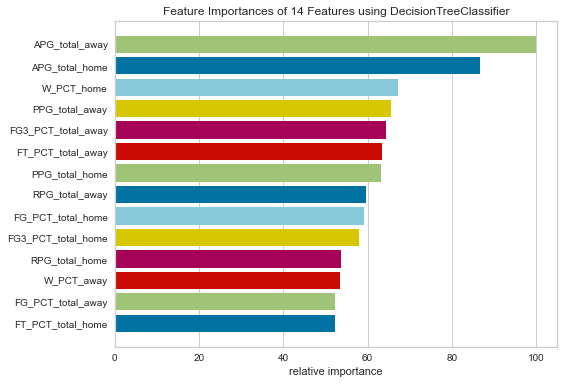

---------------------------------------------
REB:

Best decision tree accuracy ({'criterion': 'entropy', 'min_impurity_decrease': 0.0}): 0.56
              precision    recall  f1-score   support

           0       0.51      0.54      0.53      2154
           1       0.59      0.57      0.58      2550

    accuracy                           0.56      4704
   macro avg       0.55      0.55      0.55      4704
weighted avg       0.56      0.56      0.56      4704



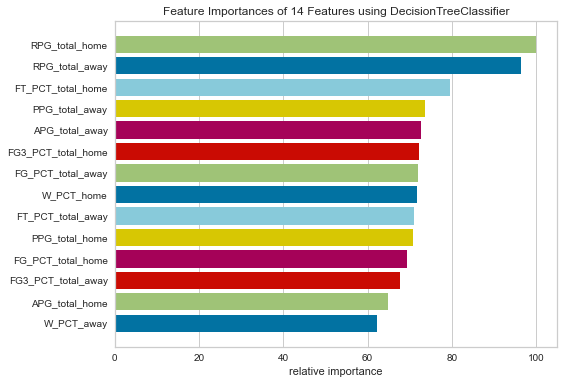

---------------------------------------------


In [72]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune max leaves

WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'max_leaf_nodes': 31}): 0.72
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1962
           1       0.74      0.80      0.77      2742

    accuracy                           0.72      4704
   macro avg       0.71      0.70      0.70      4704
weighted avg       0.71      0.72      0.71      4704



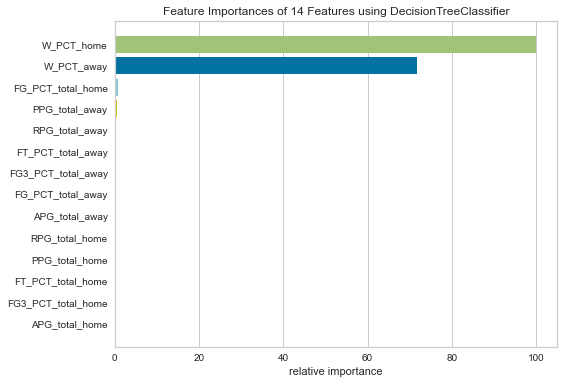

---------------------------------------------
FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'max_leaf_nodes': 24}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      2162
           1       0.64      0.71      0.68      2542

    accuracy                           0.63      4704
   macro avg       0.63      0.63      0.63      4704
weighted avg       0.63      0.63      0.63      4704



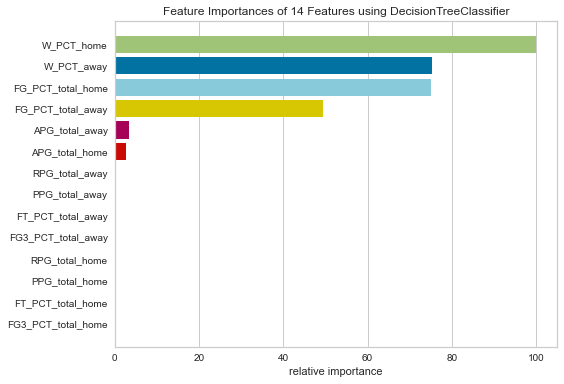

---------------------------------------------
FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'max_leaf_nodes': 13}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      2332
           1       0.57      0.70      0.63      2372

    accuracy                           0.58      4704
   macro avg       0.58      0.58      0.57      4704
weighted avg       0.58      0.58      0.57      4704



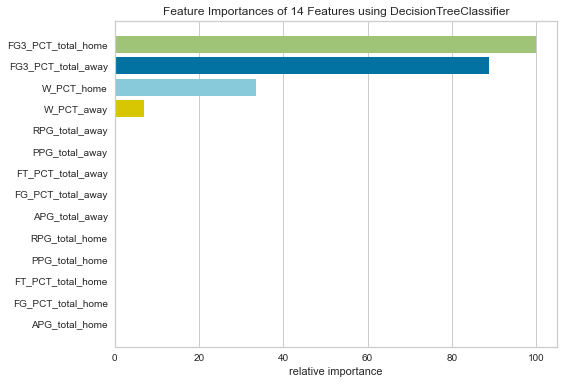

---------------------------------------------
FT:

Best decision tree accuracy ({'criterion': 'entropy', 'max_leaf_nodes': 25}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.51      0.57      2403
           1       0.58      0.70      0.64      2301

    accuracy                           0.61      4704
   macro avg       0.61      0.61      0.60      4704
weighted avg       0.61      0.61      0.60      4704



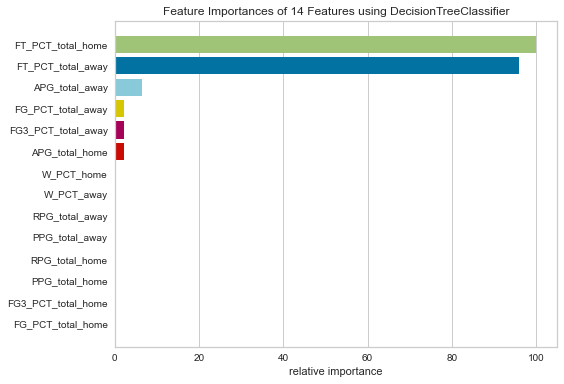

---------------------------------------------
AST:

Best decision tree accuracy ({'criterion': 'entropy', 'max_leaf_nodes': 40}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      2144
           1       0.64      0.72      0.68      2560

    accuracy                           0.63      4704
   macro avg       0.62      0.62      0.62      4704
weighted avg       0.63      0.63      0.62      4704



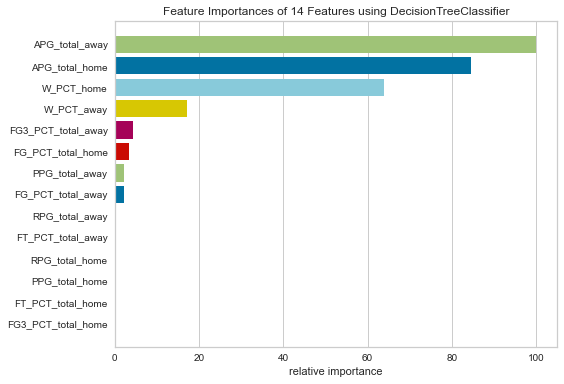

---------------------------------------------
REB:

Best decision tree accuracy ({'criterion': 'gini', 'max_leaf_nodes': 28}): 0.60
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      2154
           1       0.62      0.65      0.64      2550

    accuracy                           0.60      4704
   macro avg       0.60      0.59      0.59      4704
weighted avg       0.60      0.60      0.60      4704



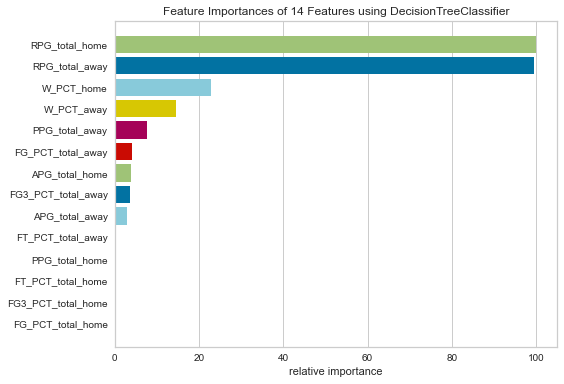

---------------------------------------------


In [73]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(2,60)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune max features

WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': None}): 0.64
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1962
           1       0.69      0.70      0.69      2742

    accuracy                           0.64      4704
   macro avg       0.63      0.63      0.63      4704
weighted avg       0.64      0.64      0.64      4704



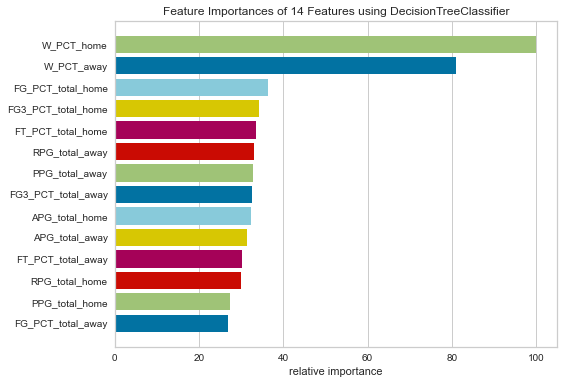

---------------------------------------------
FGP:

Best decision tree accuracy ({'criterion': 'gini', 'max_features': 8}): 0.57
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      2162
           1       0.60      0.61      0.61      2542

    accuracy                           0.57      4704
   macro avg       0.57      0.57      0.57      4704
weighted avg       0.57      0.57      0.57      4704



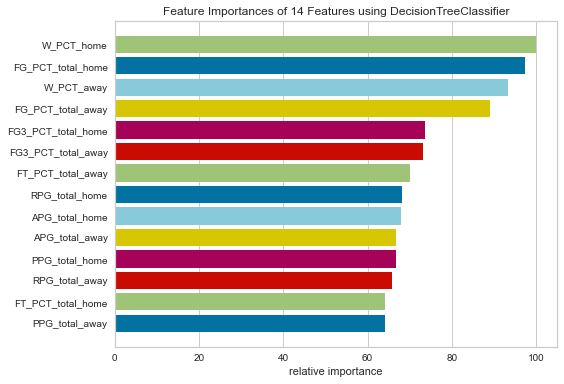

---------------------------------------------
FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': 9}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      2332
           1       0.54      0.56      0.55      2372

    accuracy                           0.54      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.54      0.54      0.54      4704



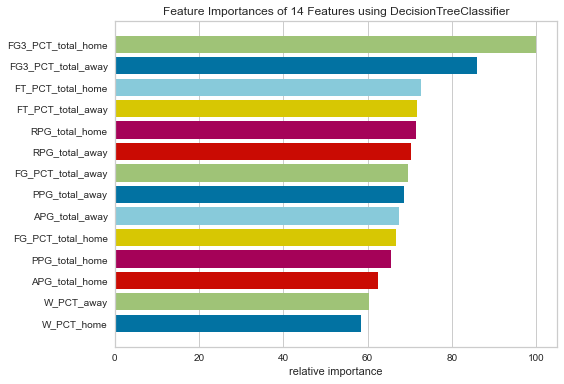

---------------------------------------------
FT:

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': 9}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      2403
           1       0.53      0.54      0.53      2301

    accuracy                           0.54      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.54      0.54      0.54      4704



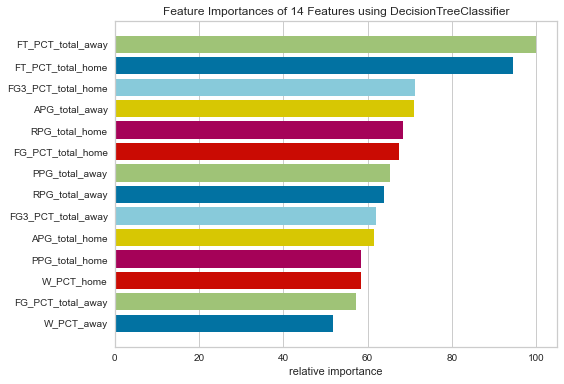

---------------------------------------------
AST:

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': 10}): 0.58
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      2144
           1       0.61      0.62      0.61      2560

    accuracy                           0.58      4704
   macro avg       0.57      0.57      0.57      4704
weighted avg       0.57      0.58      0.57      4704



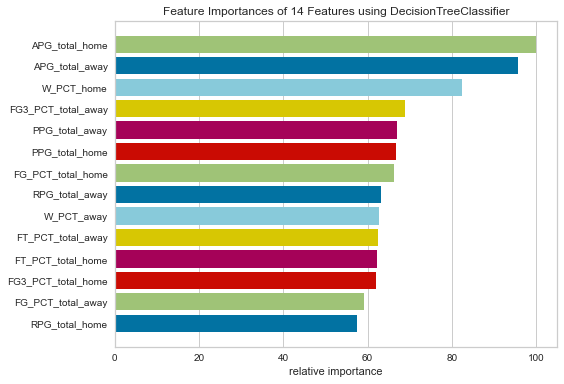

---------------------------------------------
REB:

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': 11}): 0.55
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      2154
           1       0.58      0.58      0.58      2550

    accuracy                           0.55      4704
   macro avg       0.54      0.54      0.54      4704
weighted avg       0.55      0.55      0.55      4704



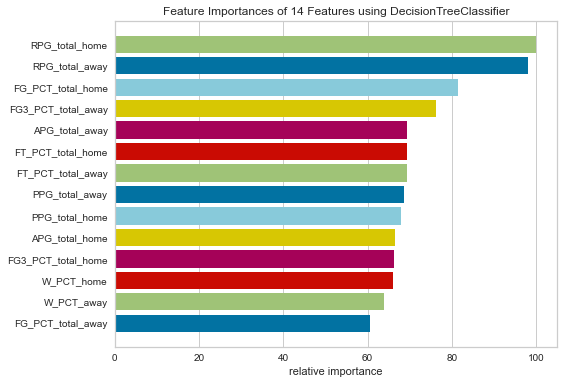

---------------------------------------------


In [74]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
    },
)

## Tree of max leaves=31

In [75]:
# plt.figure(figsize=(30,20))
# t = plot_tree(
#     cv_max_leaves_clf.best_estimator_,
#     feature_names=cumulative_stats_copy_df.columns
# )